In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


In [2]:
ipl = pd.read_csv('/home/ghost/Python DS/Ipl_auction/IPLPlayerAuctionData.csv')
ipl.head(10)

,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Kings XI Punjab,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas
5,Abdul Samad,All-Rounder,2000000,Sunrisers Hyderabad,2020.0,Indian
6,Abhijeet Tomar,Batsman,4000000,Kolkata Knight Riders,2022.0,Indian
7,Abhimanyu Mithun,Bowler,3000000,Mumbai Indians,2015.0,Indian
8,Abhimanyu Mithun,Bowler,3000000,Sunrisers Hyderabad,2016.0,Indian
9,Abhinav Sadarangani,Batsman,26000000,Gujarat Titans,2022.0,Indian


In [3]:
def PlayerDetail(name):
    ipl =  pd.read_csv('/home/ghost/Python DS/Ipl_auction/IPLPlayerAuctionData.csv')
    detail = ipl[ipl['Player'] == name]
    return detail


PlayerDetail('Abhimanyu Mithun')

,Player,Role,Amount,Team,Year,Player Origin
7,Abhimanyu Mithun,Bowler,3000000,Mumbai Indians,2015.0,Indian
8,Abhimanyu Mithun,Bowler,3000000,Sunrisers Hyderabad,2016.0,Indian


In [25]:
def TopPlayersINYear(year):
    # Filter by the specified year
    data = ipl[ipl['Year'] == year]
    # Sort by Amount in descending order and take the top 10
    top_players = data.sort_values(by='Amount', ascending=False).head(10)
    return top_players[['Year', 'Player', 'Amount', 'Team', 'Role']]

TopPlayersINYear(2018)

,Year,Player,Amount,Team,Role
138,2018.0,Benjamin Stokes,125000000,Rajasthan Royals,All-Rounder
360,2018.0,Jaydev Unadkat,115000000,Rajasthan Royals,Bowler
433,2018.0,KL Rahul,110000000,Kings XI Punjab,Batsman
494,2018.0,Manish Pandey,110000000,Sunrisers Hyderabad,Batsman
176,2018.0,Chris Lynn,96000000,Kolkata Knight Riders,Batsman
542,2018.0,Mitchell Starc,94000000,Kolkata Knight Riders,Bowler
278,2018.0,Glenn Maxwell,90000000,Delhi Daredevils,All-Rounder
719,2018.0,Rashid Khan Arman,90000000,Sunrisers Hyderabad,Bowler
441,2018.0,Krunal Pandya,88000000,Mumbai Indians,All-Rounder
781,2018.0,Sanju Samson,80000000,Rajasthan Royals,Wicket Keeper


<Axes: xlabel='Year,Team'>

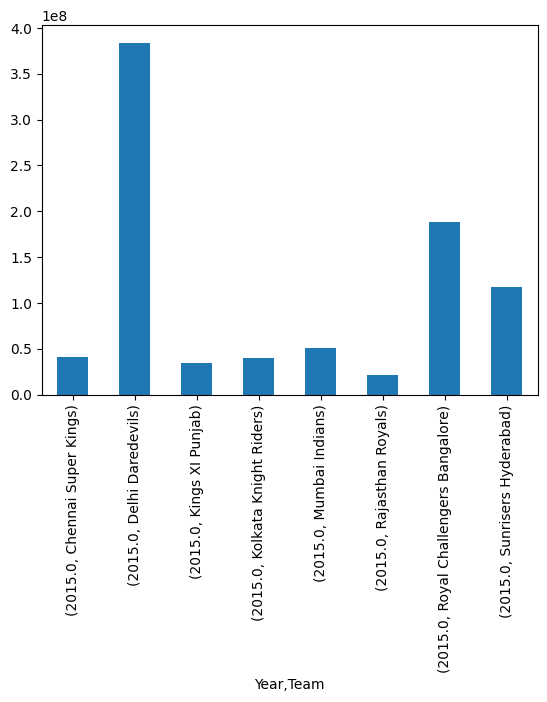

In [5]:
def TeamSpending(year):
    # Filter by the specified year
    data = ipl[ipl['Year'] == year]
    # Sort by Amount in descending order and take the top 10
    df2 = data.groupby(['Year','Team'])['Amount'].sum()
    return df2.plot(kind ='bar')


TeamSpending(2015)

# df1 = ipl[ipl['Year'] == 2014]




In [48]:
def TeamSpending( year):
    ipl = pd.read_csv('/home/ghost/Python DS/Ipl_auction/IPLPlayerAuctionData.csv')
    
    # Filter data by the specified year
    data = ipl[ipl['Year'] == year]
    
    # Group by 'Team' and calculate total spending per team
    df2 = data.groupby('Team')['Amount'].sum().reset_index()
    df2.columns = ['Team', 'TotalAmountSpent']
    df2['Year'] = year  # Add the year as a column for context

    # Convert to list of dictionaries for easy rendering in template
    return df2.to_dict(orient="records")
    # return df2


TeamSpending(2015)

[{'Team': 'Chennai Super Kings', 'TotalAmountSpent': 41000000, 'Year': 2015},
 {'Team': 'Delhi Daredevils', 'TotalAmountSpent': 384000000, 'Year': 2015},
 {'Team': 'Kings XI Punjab', 'TotalAmountSpent': 34000000, 'Year': 2015},
 {'Team': 'Kolkata Knight Riders', 'TotalAmountSpent': 40000000, 'Year': 2015},
 {'Team': 'Mumbai Indians', 'TotalAmountSpent': 51000000, 'Year': 2015},
 {'Team': 'Rajasthan Royals', 'TotalAmountSpent': 21000000, 'Year': 2015},
 {'Team': 'Royal Challengers Bangalore',
  'TotalAmountSpent': 188000000,
  'Year': 2015},
 {'Team': 'Sunrisers Hyderabad', 'TotalAmountSpent': 117000000, 'Year': 2015}]

In [73]:
# Player Origin Comparison
ipl.head(5)

def camparison(year):
    data = ipl[ipl['Year'] == year]
    df1 = data.groupby(['Year','Player Origin'])['Amount'].mean().reset_index()
    fig = px.pie(
        df1,
        values='Amount',
        names='Player Origin',
        title="Average Amount Spent on Players by Origin ({year})",
        color_discrete_sequence=['skyblue', 'orange']  # Custom colors for each category
    )
    return fig
camparison(2022)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'Player Origin=%{label}<br>Amount=%{value}<extra></extra>',
              'labels': array(['Indian', 'Overseas'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([22934306.56934306, 35447761.19402985])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [skyblue, orange],
               'template': '...',
               'title': {'text': 'Average Amount Spent on Players by Origin ({year})'}}
})

In [11]:
def yearly_auction_trends():
    # Group by 'Year' and sum the 'Amount' for each year
    df2 = ipl.groupby('Year')['Amount'].sum().reset_index()

    # Plot with Plotly
    fig = px.bar(
        df2,
        x='Year',
        y='Amount',
        title="Yearly Auction Spending Trends in IPL",
        labels={'Amount': 'Total Amount Spent (₹)', 'Year': 'Year'},
        color_discrete_sequence=['#1f77b4']  # Custom color for the bars
    )

    fig.update_layout(
        xaxis=dict(dtick=1),  # Ensure one bar per year on the x-axis if all years are integers
        yaxis_title="Total Amount Spent (₹)"
    )
    
    return fig

# Assuming 'ipl' is your DataFrame containing the IPL data
# fig = yearly_auction_trends(ipl)
# fig.show()
yearly_auction_trends()

In [12]:
ipl['Year'].unique()

array([2014., 2015., 2016., 2018., 2020., 2022., 2013., 2021., 2017.,
       2019.,   nan])

In [27]:
# Team Composition and Spending Distribution
ipl.head(5)
def SpendingDistribution(year, name):
    # Filter data for the specified year and team
    df1 = ipl[(ipl['Year'] == year) & (ipl['Team'] == name)]
    
    # Group by 'Player Origin', 'Team', and 'Role' to get the spending amount
    df2 = df1.groupby(['Player Origin','Team', 'Role'])['Amount'].sum().reset_index()
    
    # Create the Plotly pie chart
    fig = px.pie(
        df2,
        values='Amount',
        names='Role',  # Displaying roles as pie sections
        title=f"Spending Distribution by Role for {name} in {year}",
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    
    # Update layout to improve readability
    fig.update_traces(textinfo='percent+label')
    fig.update_layout(
        legend_title_text='Player Role',
        title_x=0.5,  # Center align the title
    )
    
    # Display the chart
    return df2 ,fig.show()

# Usage
SpendingDistribution(2022, 'Royal Challengers Bangalore')

# ipl[(ipl['Year'] == 2015) & (ipl['Team'] == 'Royal Challengers Bangalore')]

(  Player Origin                         Team           Role     Amount
 0        Indian  Royal Challengers Bangalore    All-Rounder  146000000
 1        Indian  Royal Challengers Bangalore         Bowler   17000000
 2        Indian  Royal Challengers Bangalore  Wicket Keeper   91000000
 3      Overseas  Royal Challengers Bangalore    All-Rounder  137500000
 4      Overseas  Royal Challengers Bangalore        Batsman   78000000
 5      Overseas  Royal Challengers Bangalore         Bowler   85000000,
 None)

In [47]:
# Highest-Paid Players per Team
def HighestPaidPlayerPerTeam(year):
    # Load data
    ipl = pd.read_csv('/home/ghost/Python DS/Ipl_auction/IPLPlayerAuctionData.csv')

    # Filter for the specified year
    filter1 = ipl[ipl['Year'] == year]
    
    # Sort by Amount in descending order to get the highest paid players at the top
    sorted_data = filter1.sort_values(by='Amount', ascending=False)
    
    # Drop duplicate entries for each team to keep only the highest-paid player per team
    highest_paid = sorted_data.drop_duplicates(subset='Team', keep='first')
    
    # Select only relevant columns for clarity
    result = highest_paid[['Team', 'Player', 'Amount']].reset_index(drop=True)
    
    return result

# Example usage
HighestPaidPlayerPerTeam(2015)

,Team,Player,Amount
0,Delhi Daredevils,Yuvraj Singh,160000000
1,Royal Challengers Bangalore,Dinesh Karthik,105000000
2,Sunrisers Hyderabad,Trent Boult,38000000
3,Mumbai Indians,Aaron Finch,32000000
4,Kings XI Punjab,Murali Vijay,30000000
5,Kolkata Knight Riders,K.C. Cariappa,24000000
6,Chennai Super Kings,Michael Hussey,15000000
7,Rajasthan Royals,Christopher Morris,14000000
